In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#, nrows=35
dataDF = pd.read_csv("../data/fish.csv", usecols=[1, 2, 3, 4, 5])

In [221]:
def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows,ncols,idx+1)
        plt.scatter(df["Weight"], df[features[idx]], label=f'corr:{corrs[idx+1]:.2}')
        plt.legend()
        plt.xlabel("Weight")
        plt.ylabel(features[idx])
    plt.tight_layout()
    plt.show()

In [222]:
corrs=dataDF.corr()["Weight"].to_list()

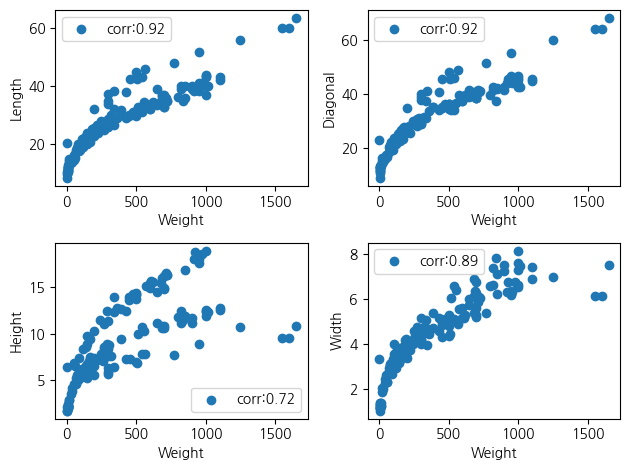

In [223]:
print_feature(2,2,dataDF,dataDF.columns[0], dataDF.columns[1:],corrs)

In [224]:
# 학습 데이터 분리 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [225]:
featureDF=dataDF[dataDF.columns[1:]]
targetDF=dataDF[dataDF.columns[0]]

In [226]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetDF, 
                                                    test_size=0.3)

In [227]:
print(f'[훈련용] X_train : {x_train.shape}')
print(f'[검증용] X_train : {x_test.shape}')

[훈련용] X_train : (111, 4)
[검증용] X_train : (48, 4)


In [228]:

std_scaler.fit(x_train)

StandardScaler()

In [229]:
mm_scaler=MinMaxScaler()
mm_scaler.fit(x_train)

MinMaxScaler()

In [230]:
rb_scaler=RobustScaler()
rb_scaler.fit(x_train)

RobustScaler()

In [231]:
sl=[std_scaler, mm_scaler, rb_scaler]

sv= [[],[],[]]
sv2=[[],[],[]]

for i,v in enumerate(sl) :
    v.fit(x_train)
    sv[i]=v.transform(x_train).copy()
    v.fit(x_test)
    sv2[i]=v.transform(x_test).copy()
    
    
x_train_std=sv[0]
x_train_mm=sv[1]
x_train_rb=sv[2]
x_test_std=sv2[0]
x_test_mm=sv2[1]
x_test_rb=sv2[2]

In [232]:
x_train_std

array([[-5.36531544e-01, -5.34271406e-01, -5.15553505e-01,
        -4.52789855e-01],
       [ 9.22933068e-01,  1.07627627e+00,  2.16812897e+00,
         1.16211161e+00],
       [-3.06555302e-01, -3.78939396e-01, -4.92232625e-01,
        -8.91104210e-02],
       [-1.33260315e+00, -1.39268514e+00, -1.53672678e+00,
        -1.80158154e+00],
       [-5.36531544e-01, -5.01569930e-01, -7.09948859e-01,
        -3.31210290e-01],
       [ 6.13349665e-01,  7.98313725e-01,  1.76447852e+00,
         1.04323904e+00],
       [-1.04955547e+00, -1.11472260e+00, -9.94041708e-01,
        -9.91953443e-01],
       [-4.92305344e-01, -4.77043823e-01, -5.70375151e-01,
        -3.04375691e-01],
       [ 3.47992463e-01,  5.20351183e-01,  1.54795763e+00,
         7.43115235e-01],
       [-1.11147215e+00, -1.09837186e+00, -5.28842891e-01,
        -1.17873638e+00],
       [-7.13436346e-01, -7.05954152e-01, -6.13501200e-01,
        -4.37254034e-01],
       [-5.98448225e-01, -6.56901939e-01, -5.74125242e-01,
      

In [233]:
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_std, y_train)
print(f"{model.coef_}{model.intercept_}") # coef가 4개인 이유은 feature항목이 4개이기 때문이다 

[ 503.54434033 -218.83594746   76.47754758   21.69765775]393.26846846846837


$\cong$

In [234]:

dataset=[x_train_std, x_train_mm, x_train_rb, x_test_std, x_test_mm, x_test_rb]
score_list=[]
for i in range(int(len(dataset)/2)) :
    model=LinearRegression()
    model.fit(dataset[i], y_train)
    train_score=model.score(dataset[i], y_train)
    model.fit(dataset[i+3], y_test)
    test_score=model.score(dataset[i+3], y_test)
    score_list.append([train_score, test_score])


In [235]:
score_list

[[0.8915759121289957, 0.914429354701205],
 [0.8915759121289958, 0.914429354701205],
 [0.8915759121289958, 0.914429354701205]]

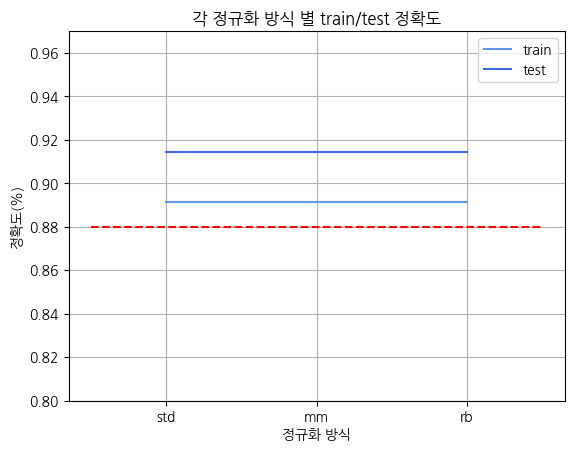

In [242]:
import koreanize_matplotlib

data=np.array(score_list).T
plt.plot(range(3), data[0], color='cornflowerblue', label='train')
plt.plot(range(3), data[1], color='royalblue', label='test')
plt.legend()
plt.hlines(y=0.88, xmin=-0.5, xmax=2.5, colors='r', linestyles='dashed', label='Horizontal Line')
plt.xticks(range(3), ['std', 'mm', 'rb'])
plt.xlabel("정규화 방식")
plt.ylabel("정확도(%)")
plt.title("각 정규화 방식 별 train/test 정확도")
plt.ylim(0.8, 0.97)
plt.grid(True)
plt.show()

In [ ]:
# Standard : 이상치에 영향을 많이 받음
# => 평균0, 표준편차1
# MinMax : 최소0 ~ 최대1로 맵핑
# Robust : 